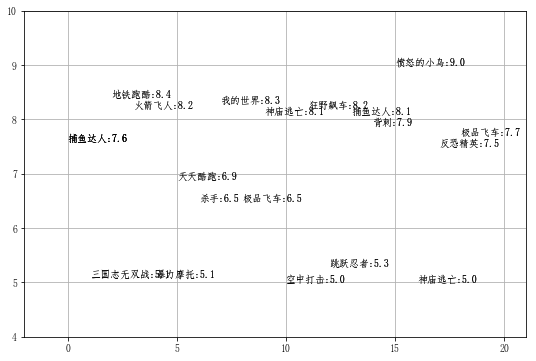

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation  

#data_prefix = "../datasets/data/"

#data_src = "world-cup-predictions/wc-20140609-140000.csv"

#dataReal = data_prefix+data_src
def set_ch(): 
    "在plot图中显示中文"
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    return
set_ch() # 显示中文在plot中
pdata = pd.read_csv('gamegrade.csv',encoding='gbk')
pdata.head()
minLimit = 0
maxLimit = 19

countryList = pdata["游戏名称"].values[minLimit:maxLimit]
spiScore = pdata["评分"].values[minLimit:maxLimit]

x_pos = list(range(len(countryList)))
fig, ax = plt.subplots(figsize=(9,6))
ax.grid()

ax.set_ylim(min(spiScore), max(spiScore))
ax.set_xlim(0, len(x_pos))

line, = ax.plot([], [], lw=1)
xdata, ydata = [],[]

def animate(i):
 	#print( "append_line ",i )
 	ax.annotate(countryList[i] + ":" + str(spiScore[i]), (i, spiScore[i] ))
 	line.set_data(x_pos[0:i+1], spiScore[0:i+1])
 	return line,

anim = animation.FuncAnimation(fig,animate,len(x_pos),repeat=False,interval=200,blit=False)
for i in range(len(x_pos)):
    ax.annotate(countryList[i] + ":" + str(spiScore[i]), (i, spiScore[i] ))

ax.set_ylim(4,10)
ax.set_xlim(-2,21)
line.set_data(x_pos[:], spiScore[:])

anim.save('animation_final.mp4', fps=10, extra_args=['-vcodec', 'libx264'])